# 🛏️ What makes an accomaodation so great?

In this notebook we are trying to find the different characteristics that make an accommodation great for different guest. 
We are going to use the available open data from one of the major circular economies companies in the sector:

<p align="center">
	<img src="./imgs/airbnb_logo.png" alt="logo" width="120"/>
</p>

We are going to answer different questions to find our ultimate goal and see what really make so great an accommodation. 
Firstly, we are going to start by importing all the libraries needed during this process.

## 📓 Libraries and data gathering

We are going to use
* pandas==1.3.4 for data manipulation.
* folium==0.12.1 for maps visualization
* dowhy==0.6 for causal inference
* seaborn==0.11.2 for data visualization
* matplotlib==3.5.0 for data visualization
* numpy==1.20.3 for data manipulation
* scikit-learn==1.0.1 for simple modelling

In [1]:
# Data Manipulation
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np

# Map Visualization
import folium as fl
from folium.plugins import HeatMap
from folium.plugins import PolyLineTextPath

# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Modeling tools
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

# Causal Model
import dowhy

# Configure warning and logging
# Config dict to set the logging level
import logging.config
DEFAULT_LOGGING = {
    'version': 1,
    'disable_existing_loggers': False,
    'loggers': {
        '': {
            'level': 'INFO',
        },
    }
}

logging.config.dictConfig(DEFAULT_LOGGING)

# Disabling warnings output
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

For this example we are going to use the data from Airbnb gathered in [Inside Airbnb](http://insideairbnb.com/get-the-data.html).
This project gathered all the data by scrapping the Airbnb webpage. 
We are going to take one location and as I am from Madrid I am going to take the data from my city 😄

In [2]:
DATA_URL = "http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2021-11-07/data/listings.csv.gz"

df = pd.read_csv(DATA_URL)

## 🔍 Exploratory Data Analysis

Let's take a look to the data.

In [3]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6369,https://www.airbnb.com/rooms/6369,20211107050018,2021-11-07,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,NaN,https://a0.muscache.com/pictures/683224/4cc318...,13660,https://www.airbnb.com/users/show/13660,...,4.89,4.77,4.85,NaN,f,1,0,1,0,1.17
1,21853,https://www.airbnb.com/rooms/21853,20211107050018,2021-11-07,Bright and airy room,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,83531,https://www.airbnb.com/users/show/83531,...,4.82,4.21,4.67,NaN,f,2,0,2,0,0.38
2,23001,https://www.airbnb.com/rooms/23001,20211107050018,2021-11-07,Apartmento Arganzuela- Madrid Rio,"Apartamento de tres dormitorios dobles, gran s...","Barrio Arganzuela, junto a Madrid Rio, zonas c...",https://a0.muscache.com/pictures/58e6a770-509c...,82175,https://www.airbnb.com/users/show/82175,...,NaN,NaN,NaN,NaN,f,6,5,1,0,NaN
3,24805,https://www.airbnb.com/rooms/24805,20211107050018,2021-11-07,Gran Via Studio Madrid,"Studio located 50 meters from Gran Via, next t...","The area is next to the Gran Via, so people li...",https://a0.muscache.com/pictures/miso/Hosting-...,346366726,https://www.airbnb.com/users/show/346366726,...,5.00,5.00,4.83,NaN,f,1,1,0,0,0.47
4,26825,https://www.airbnb.com/rooms/26825,20211107050018,2021-11-07,Single Room whith private Bathroom,Nice and cozy roon for one person with a priva...,"Es un barrio muy tranquilo, en una zona de Mad...",https://a0.muscache.com/pictures/149358/218d5b...,114340,https://www.airbnb.com/users/show/114340,...,4.71,4.70,4.72,NaN,f,1,0,1,0,1.65


We can see that we have different ids to identify the listing, description, info from the host, info from the listing, price, etc. Which information do we have more precisely?

In [4]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In order to simplify the analysis let's take the most relevant information to explore the data.

In [5]:
RELEVANT_COLUMNS = [
	"id",
	"name",
	"host_response_time",
	"host_acceptance_rate",
	"host_is_superhost",
	"host_total_listings_count",
	"host_identity_verified",
	"host_has_profile_pic",
	"neighbourhood_group_cleansed",
	"latitude",
	"longitude",
	"property_type",
	"room_type",
	"accommodates",
	"bathrooms_text",
	"amenities",
	"bedrooms",
	"beds",
	"price",
	"minimum_nights",
	"availability_365",
	"number_of_reviews",
	"review_scores_rating",
	"review_scores_accuracy",
	"review_scores_cleanliness",
	"review_scores_checkin",
	"review_scores_communication",
	"review_scores_location",
	"review_scores_value",
	"reviews_per_month",
	"instant_bookable"
]

pd_listings = df[RELEVANT_COLUMNS]
pd_listings.dropna(subset=set(RELEVANT_COLUMNS)-set(["host_response_time","host_acceptance_rate"]),inplace=True)
pd_listings.loc[pd_listings.bathrooms_text.str.contains("Half|half", regex=True),"bathrooms_text"] = "0.5 baths"
pd_listings["bathrooms"] = pd_listings.bathrooms_text.str.extract("(\d*\.?\d+)").astype('float')
pd_listings["host_acceptance_rate"] = pd_listings.host_acceptance_rate.str.extract("(\d*\.?\d+)").astype('float')/100
pd_listings = pd_listings.reset_index(drop=True)
pd_listings['price'] = pd_listings['price'].str.replace("[$, ]", "").astype("float")

/tmp/ipykernel_3560/2569180241.py:41: FutureWarning: The default value of regex will change from True to False in a future version.
  pd_listings['price'] = pd_listings['price'].str.replace("[$, ]", "").astype("float")


And how many listings do we have?

In [6]:
print(f"{pd_listings.id.nunique()} unique listings in Madrid")

11758 unique listings in Madrid


Those are all the columns that we have, for a more concrete explanation you can check this [link](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=982310896). But we have enough information to seek for the reasons of a high or low rating for the listing.
Okay, so we will start by asking the first question.

### ☝️ Where are the different listings in Madrid?

Let's plot the location of the different listings grouped by neighbourhood and see their locations.

In [7]:
# visualize the amount of listing clusters in Madrid

def draw_map():
    mad = [pd_listings.latitude.mean(), pd_listings.longitude.mean()]
    boroughs = pd_listings.groupby('neighbourhood_group_cleansed').mean().reset_index()
    boroughs_name = boroughs['neighbourhood_group_cleansed'].values.tolist()
    boroughs_loc = boroughs[['latitude', 'longitude']].values.tolist()

    base_map = fl.Map(
        location = mad,
        control_scale = True,
        zoom_start = 12,
        tiles = 'stamen toner'
    )

    for i in range(len(boroughs_name)):
        attr = {'fill': 'black', 'font-weight': 'bold', 'font-size': '15'}
        pl = fl.PolyLine([
            [boroughs_loc[i][0], 
            boroughs_loc[i][1]-.1], 
            [boroughs_loc[i][0], 
            boroughs_loc[i][1]+.1]],
            weight = 15,
            color = 'rgb(255,255,255, 0)'
        )
        base_map.add_child(pl)
        base_map.add_child(
            PolyLineTextPath(
                pl,
                text = boroughs_name[i],
                attributes = attr,
                center = True
            )
        )
    
    return base_map

base_map = draw_map()    
base_map.add_child(
    HeatMap(
        data = pd_listings[['latitude', 'longitude']],
        min_opacity = 0.5,
        radius = 15,
        blur = 20
    )
)
base_map

As we can see all the listings are concentrated in the city center and there are more next to the them.
Let's check the proportion of listings by neighbourhood.

In [8]:
round(pd_listings.neighbourhood_group_cleansed.value_counts(normalize=True)*100,2)

Centro                   48.70
Salamanca                 6.85
Arganzuela                6.03
Chamberí                  5.23
Tetuán                    3.96
Retiro                    3.58
Carabanchel               3.09
Ciudad Lineal             2.87
Latina                    2.68
Chamartín                 2.61
Moncloa - Aravaca         2.60
Puente de Vallecas        2.51
Hortaleza                 2.03
San Blas - Canillejas     1.62
Fuencarral - El Pardo     1.41
Usera                     1.34
Villaverde                0.87
Barajas                   0.83
Moratalaz                 0.47
Villa de Vallecas         0.46
Vicálvaro                 0.26
Name: neighbourhood_group_cleansed, dtype: float64

Almost half of them are in the center of the city, them the closer neighbourhoods are the one with more listings.
Let's continue exploring the data, but this time focusing in the other important variable that is money 💰.

### ✌️ How much money do guest pay per night?

We are going to analyze how much money our guests spend per night in madrid.
To normalise price to compare between listings, the price per person per night is used as a good measure. 
That's what we usually do when travel.

count    11758.000000
mean        20.492204
std         63.962130
min          0.013333
25%          6.500000
50%         11.875000
75%         21.393750
max       3333.000000
Name: price_per_person_per_night, dtype: float64


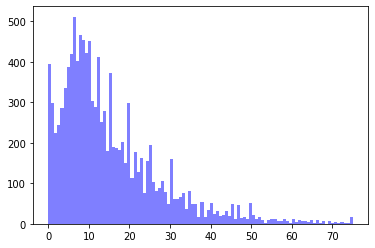

In [9]:
pd_listings['price_per_person_per_night'] = pd_listings['price'] / pd_listings['accommodates'] / pd_listings['minimum_nights']
n, bins, patches = plt.hist(pd_listings['price_per_person_per_night'], 100, facecolor='blue', alpha=0.5, range=(0,75))
print(pd_listings['price_per_person_per_night'].describe())

In this case the average price per nigth is around 32USD as the information is coming from open data extracted from the website. 

### 👌 How much money do hosts gain per listing?

We now know what guest pay but how about what hosts gain from them.
Thus, we are going to calculate the revenue per listing.
But we need how many people come to that listing, it is easy as we also have the reviews so it is not the exact estimation but a good approach.

In [10]:
pd_listings.rename(columns={'id':'listing_id'}, inplace=True)
pd_reviews = pd.read_csv("http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2021-11-07/data/reviews.csv.gz")
pd_reviews = pd_reviews[['id','listing_id','date']]
# basic conversions
pd_reviews['date'] = pd.to_datetime(pd_reviews['date'])
pd_bookings = pd.merge(pd_reviews, pd_listings, on='listing_id')

Now that we have the people that come to the listing let's see the estimated revenue.

In [11]:
# get estimated bookings base on reviews
pd_bookings = pd.merge(pd_reviews, pd_listings, on='listing_id')
pd_bookings['estimated_revenue'] = pd_bookings['price'] * pd_bookings['minimum_nights']
# get revenue by listings
pd_listings_revenue = pd_bookings[['listing_id','estimated_revenue']].groupby(['listing_id']).sum()

pd_listings = pd.merge(pd_listings, pd_listings_revenue, on='listing_id', how='left')
pd_listings.loc[pd_listings['estimated_revenue'].isnull(), 'estimated_revenue'] = 0

What is the correlation between minimum nights and estimated revenue?

In [12]:
pd_listings[['minimum_nights','estimated_revenue']].corr()

,minimum_nights,estimated_revenue
minimum_nights,1.00000,0.34152
estimated_revenue,0.34152,1.00000


As it can be extracted, minimum nights and estimated revenue are correlated but not too high. However, the number of nights spent in a listing is directly related with the revenue.

When is the best time of the year to rent an accommodation?

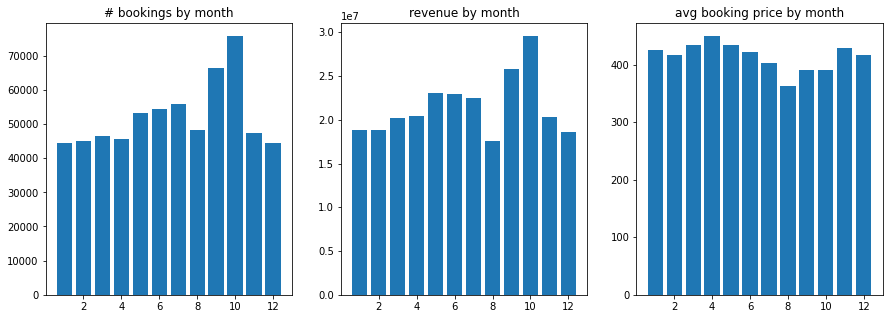

In [13]:
plt.figure(figsize=(15, 5))

# # bookings by month
plotdata = pd_reviews[['date']].groupby(pd_reviews["date"].dt.month).count()
plotdata.rename(columns={'date':'# of bookings'}, inplace=True)

ax = plt.subplot(1, 3, 1)
ax.set_title("# bookings by month")
plt.bar(plotdata.index, plotdata['# of bookings'])

# revenue by month
plotdata2 = pd_bookings[['date','estimated_revenue']].groupby(pd_bookings["date"].dt.month).sum()
plotdata2.rename(columns={'estimated_revenue':'revenue'}, inplace=True)

ax = plt.subplot(1, 3, 2)
ax.set_title("revenue by month")
plt.bar(plotdata2.index, plotdata2['revenue'])

# avg booking price by month
plotdata3 = pd.concat([plotdata, plotdata2], axis=1)
plotdata3['avg booking price'] = plotdata3['revenue'] / plotdata3['# of bookings']
plotdata3.head()

ax = plt.subplot(1, 3, 3)
ax.set_title("avg booking price by month")
plt.bar(plotdata3.index, plotdata3['avg booking price'])

_ = plt.plot()

The best time to rent an accommodation in Madrid is September and October. However, it doesn't seem that they present the higher price in average.
But which neighbourhood has the highest revenue?

In [14]:
pd_neighbourhood_revenue = pd_listings[['neighbourhood_group_cleansed','estimated_revenue']].groupby(['neighbourhood_group_cleansed']).mean().sort_values('estimated_revenue', ascending=False)
print(pd_neighbourhood_revenue)

                              estimated_revenue
neighbourhood_group_cleansed                   
Centro                             29782.978694
Arganzuela                         27677.042313
Salamanca                          20719.653416
Retiro                             20446.833729
Carabanchel                        20415.347107
Chamberí                           18254.504065
Chamartín                          11738.218241
Tetuán                             11426.461373
Villaverde                         10590.872549
Hortaleza                           9990.343096
Latina                              9690.860317
Moncloa - Aravaca                   7606.150327
Moratalaz                           6654.490909
Barajas                             6132.255102
Fuencarral - El Pardo               5895.210843
Puente de Vallecas                  5498.793220
Ciudad Lineal                       5271.902367
San Blas - Canillejas               4743.120419
Vicálvaro                           4618

The higher price are at the city center and closer neighbourhoods to it as it is a bit less pricy.
We have already seen the price factor in the two groups so let's continue seeing the attractiveness based on reviews.

### 👌☝️Which are the factors that most attract them?

Top most correlated columns:
review_scores_value
review_scores_accuracy
review_scores_cleanliness
review_scores_communication
review_scores_checkin
review_scores_location


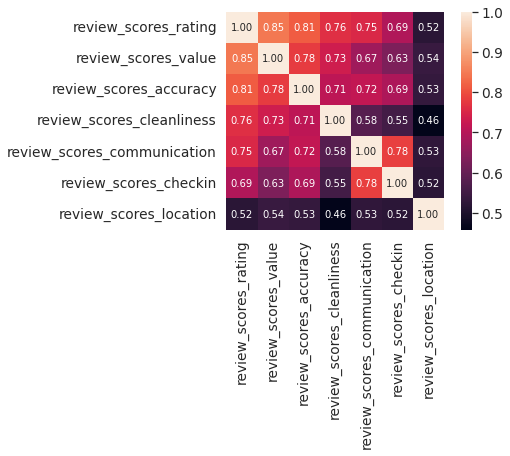

In [15]:
pd_listings_reviews = pd_listings[['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']]

def plot_topn_correlation_matrix_with_target(df, target_col_name, k=10):
  corrmat = df.corr()
  top_correlated_columns = corrmat.nlargest(k, target_col_name)[target_col_name].index
  cm = np.corrcoef(df[top_correlated_columns].values.T)
  sns.set(font_scale=1.25)
  hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': k}, yticklabels=top_correlated_columns.values, xticklabels=top_correlated_columns.values)
  
  return top_correlated_columns.values

top_correlated_columns = plot_topn_correlation_matrix_with_target(pd_listings_reviews, 'review_scores_rating')

print("Top most correlated columns:")
for i in top_correlated_columns:
  if(i!='review_scores_rating'):
    print(i)

The overall scoring depends mostly on the accuracy of the accommodation, how clean it is and the rating of this listing. 
So, people normally evaluate the whole accommodation based on those premises. 
On the other side, the checkin and communication are two factors very well related as it is the moment in which the guest enter the accommodation. 
Finally, the location is less correlated to the other factors.

But what other factors have importance in guests?

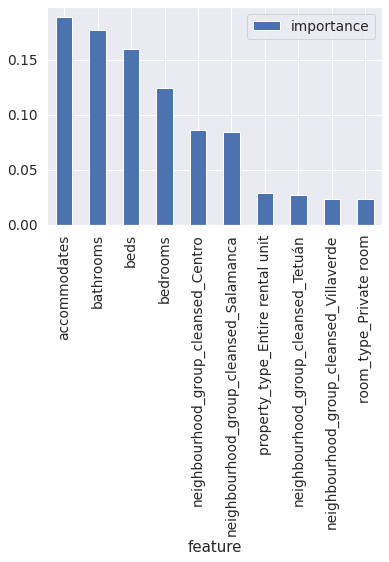

In [16]:
min_max_scaler = preprocessing.MinMaxScaler()

pd_model_data_x = pd_listings[['neighbourhood_group_cleansed','property_type','room_type','accommodates','bathrooms','bedrooms','beds']]

pd_model_data_x['accommodates'] = min_max_scaler.fit_transform(pd_model_data_x[['accommodates']])
pd_model_data_x['bathrooms'] = min_max_scaler.fit_transform(pd_model_data_x[['bathrooms']])
pd_model_data_x['bedrooms'] = min_max_scaler.fit_transform(pd_model_data_x[['bedrooms']])
pd_model_data_x['beds'] = min_max_scaler.fit_transform(pd_model_data_x[['beds']])

pd_model_data_x = pd.get_dummies(pd_model_data_x, columns=['neighbourhood_group_cleansed','property_type','room_type'])
pd_model_data_y = pd_listings['price']

# train and test - x and y
X_train, X_test, y_train, y_test = train_test_split(pd_model_data_x,pd_model_data_y,test_size=0.10, random_state=789)

#Make the decision tree
dtree = tree.DecisionTreeClassifier(
    class_weight="balanced",
    min_weight_fraction_leaf=0.01,)
dtree = dtree.fit(X_train,y_train)

#Look at outputs
importances = dtree.feature_importances_
feat_names = X_train.columns
tree_result = pd.DataFrame({'feature': feat_names, 'importance': importances})
_ = tree_result.sort_values(by='importance',ascending=False)[:10].plot(x='feature', y='importance', kind='bar')

The importance of the different ammenities of the accomodation are graded different in the guests. 
The principal one is the number of beds and accomodates, then if any guest can be at the place. 
What makes also important is that the location is another feature important and all of them are related with center neighbourhoods.

Great!! So up until now we have been playing with the data, but we have some intuitions what is making a listing so great.
Let's use some causal magic 🪄

## 🪄 Causal Inference as our main magic trick

We have some knowledge about which are the reasons that make a guest select a listing but we don't know what make it so great.
Let's use the [Dowhy library](https://microsoft.github.io/dowhy/index.html) from Microsof to tunderstand better the reasons behind.

We have considered up until now the following characteristic:
* Location
* Price
* Listing Features

But we didn't say anything about the type of the listing, host information or the availability.
Thus, we have to refine the different reasons behind what makes a listing so good. 

Thinking about different features we have the following:
- Host information
	- Picture
	- Verification
	- Super host
	- Response time
	- Acceptance rate
- Estimated revenue
- Rating frequency per month

And also we need to create the outcome variable high_rating. 
The rating threshold is the one that make half and half the division of the listings.

In [17]:
rating_threshold = 4.65
pd_listings["high_rating"] = pd_listings.review_scores_rating.apply(lambda r: True if r>4.65 else False)

According to the previous characteristics the sleceted variables to build causal model are:

In [18]:
CAUSAL_COLUMNS = [
	"listing_id",
	"name",
	"host_response_time",
	"host_acceptance_rate",
	"host_is_superhost",
	"host_total_listings_count",
	"host_identity_verified",
	"neighbourhood_group_cleansed",
	"room_type",
	"accommodates",
	"bathrooms",
	"bedrooms",
	"price",
	"minimum_nights",
	"availability_365",
	"number_of_reviews",
	"reviews_per_month",
	"review_scores_rating",
	"instant_bookable",
	"estimated_revenue",
	"high_rating"
]

pd_listing_causal = pd_listings[CAUSAL_COLUMNS]
pd_listing_causal.fillna(-1,inplace=True)

With all this information we are ready to try to measure the causal effect over the rating.
Our evaluation formally consists of the Treatment causes Outcome if changing Treatment leads to a change in Outcome keeping everything else constant.
Causal effect is the magnitude by which Outcome is changed by a unit change in Treatment.

$Causal\;\; effect\;\; of\;\; treament\;\; is\;\; givern\;\; by...$

$E[Outcome_{Treatment=1} - Outcome_{Treatment=0}]$

Let' start modelling :)

### 🙈 Step 1: Create a Causal Model

Firstly, we create teh model and the relationships of the different variables.

In [19]:
causal_graph = """digraph {
name[label="Description"];
host_response_time[label="Response Time"];
host_acceptance_rate[label="Acceptance Rate"];
host_is_superhost[label="Superhost"];
host_total_listing_count[label="# listings"];
host_identity_verified[label="Verified"];
neighbourhood_group_cleansed[label="Location"];
room_type[label="Type"];
accommodates[label="# Guests"];
bathrooms[label="# Bathrooms"];
bedrooms[label="# Bedrooms"];
price[label="Price"];
minimum_nights[label="Min nights"];
availability_365[label="Availability"];
number_of_reviews[label="# Reviews"];
reviews_per_month[label="F Reviews"];
instant_bookable[label="Instant book"];
estimated_revenue[label="Revenue"];
H[label="Host Info"];
high_rating[label="Listing Info"];
review_scores_rating[label="Rating Score"];
{host_response_time,host_acceptance_rate,host_is_superhost,host_total_listing_count,host_identity_verified}->H;
H->{high_rating,review_scores_rating};
neighbourhood_group_cleansed->{name,price,review_scores_rating};
room_type->{neighbourhood_group_cleansed,price,name};
bathrooms->{price,high_rating,room_type};
bedrooms->{price,high_rating,room_type};
accommodates->{price,high_rating,room_type};
minimum_nights->{price,estimated_revenue,high_rating};
estimated_revenue->review_scores_rating;
{H,high_rating}->availability_365;
availability_365->review_scores_rating;
instant_bookable->{high_rating,review_scores_rating};
number_of_reviews->{high_rating,review_scores_rating};
reviews_per_month->number_of_reviews;
price->{high_rating,review_scores_rating,estimated_revenue};
name->high_rating;
high_rating->{review_scores_rating,estimated_revenue};
}"""

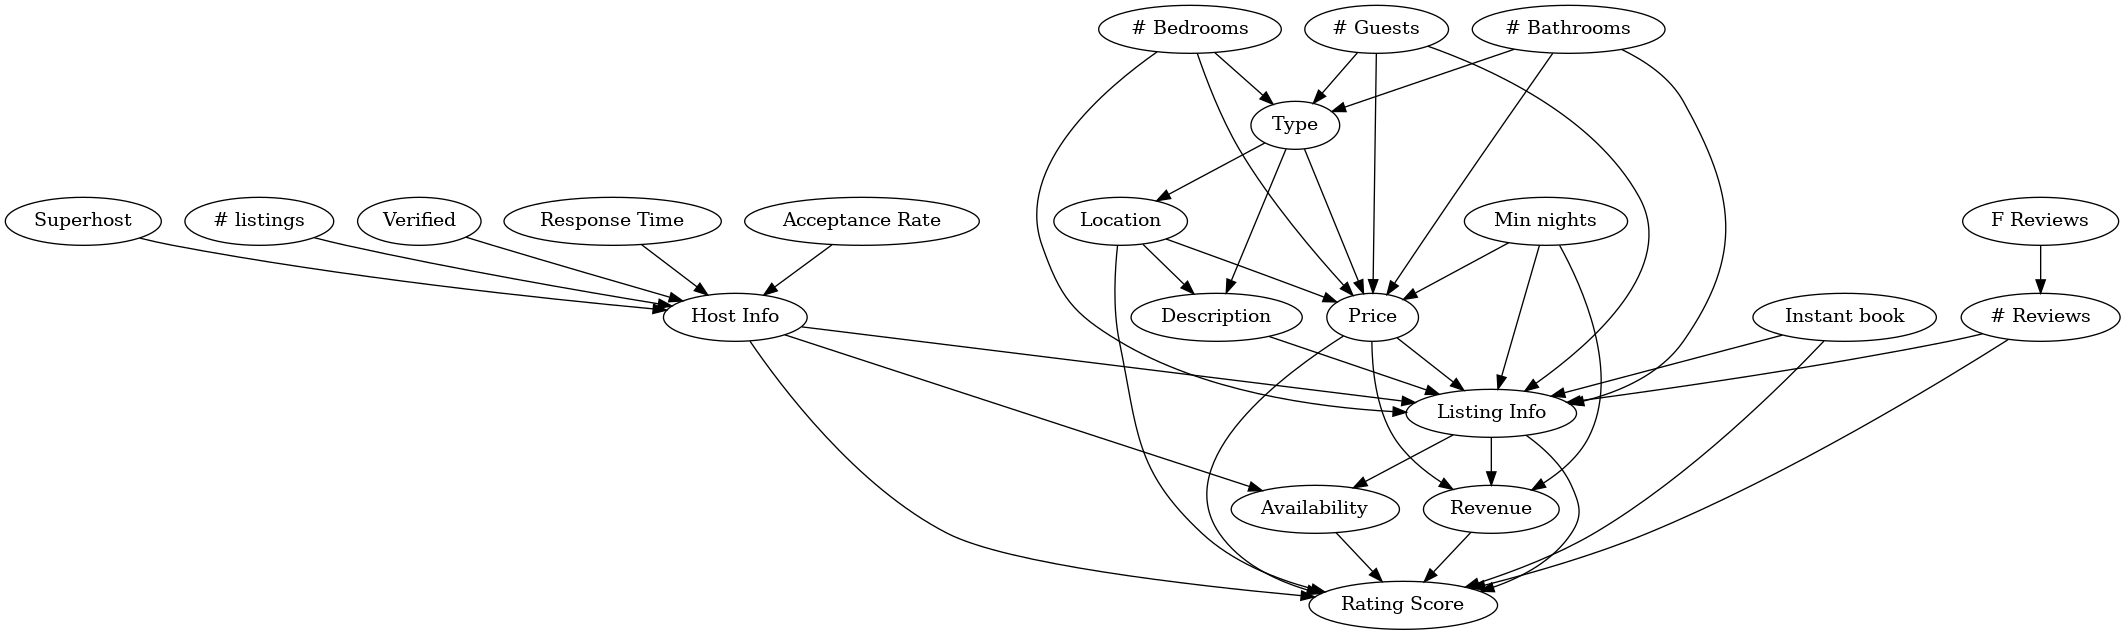

In [20]:
model= dowhy.CausalModel(
        data = pd_listing_causal,
        graph=causal_graph.replace("\n", " "),
        treatment='high_rating',
        outcome='review_scores_rating')
model.view_model()
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

This model depends totally in the assumptions made for having and outcome related with a high or low rating.
Go to phase 2

### 🙉 Step 2: Identify Cause

We say that Treatment causes Outcome if changing Treatment leads to a change in Outcome keeping everything else constant.

Keeping everything else constant can be thought by imagining a Counterfactual World or a paralell universe where everything was same uptill the point when the treatment was introduced. In the factual world the treatment was provided whereas in the Counterfactual world it wasn’t. Thus any change in Outcome that we might be observing would be solely due to the Treatment.

Thus in this step, by using properties of the causal graph, we identify the causal effect to be estimated.

In [21]:
#Identify the causal effect
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                       
──────────────(Expectation(review_scores_rating|bathrooms,minimum_nights,price
d[high_rating]                                                                

                                                                              
,host_response_time,instant_bookable,host_is_superhost,host_identity_verified,
                                                                              

                                                                              
room_type,number_of_reviews,neighbourhood_group_cleansed,reviews_per_month,bed
                                                                              

                                              
rooms,accommodates,host_acceptance_rate,name))
                                              
Estimand assumption 1, Unconfoundedness: If U→{hi

### 🙊 Step 3: Estimate identified cause

Causal effect is the magnitude by which the Outcome changes due to a unit change in Treatment. 
DoWhy provides a number of methods which can be used to calculate the identified causal estimate.
Stratification is a technique for identifying paired subpopulations whose covariate distributions are similar(similarity measured using different types of norms).

In [22]:
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_stratification",target_units="ate")
print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                       
──────────────(Expectation(review_scores_rating|bathrooms,minimum_nights,price
d[high_rating]                                                                

                                                                              
,host_response_time,instant_bookable,host_is_superhost,host_identity_verified,
                                                                              

                                                                              
room_type,number_of_reviews,neighbourhood_group_cleansed,reviews_per_month,bed
                                                                              

                                              
rooms,accommodates,host_acceptance_rate,name))
                                              
E

/home/matallanas/anaconda3/envs/causal/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.ravel()]


The result correoborate that the assumptuions that we made were correct.
A high rating dependes on:

1. Price
2. Description
3. Location
4. Host information except the number of listings that he/she had.
5. Listing characteristics: bedrooms, guests, bathroom, type, etc.
6. Reviews number and frequency

In addition, if you have a high rate in the past it is highly probable that you received agian a high rating again.
Both variables are highly correlated.

### 🐵 Step 4: Refute obtained results

The Causal part does not come from data, it comes from your assumptions (Step-1) that were used to identify(Step-2) and estimate(Step-3) the cause. 
Data is simply used for statistical estimation.

DoWhy offers Multiple Robustness Checks that can be used to test the validity of our assumptions in this case we are going to use the **Random Common Cause**.
This method consists of adding randomly drawn covariates to data and re-runs the analysis to see if the causal estimate changes or not. 
If our assumption was originally correct then there shouldn’t much variation in the causal estimate.


In [23]:
refute_results=model.refute_estimate(identified_estimand, estimate,
        method_name="random_common_cause")
print(refute_results)

Refute: Add a Random Common Cause
Estimated effect:0.6019741260267946
New effect:0.6051337925552487



/home/matallanas/anaconda3/envs/causal/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.ravel()]


There is not too much variation so our assumption was correct!!!!!! Now we can relaxed as we did it!

![phew](./imgs/obama-phew.jpg)